based on work by Sanwal Yousaf

## I am currently working through the FastAI MOOC and this NoteBook is meant to do a few things

1. For me to practce and develop my ability using the FAST AI library. 

2. I have used TensorFlow to build CNNs for this Competition and tested different architectures to get upto as high as the top 23% of the competitors in this competition. I intend to compare the results and accuracy of these two libraries as well as the ease of use of both. 
My Tensorflow Notebook can be found [here](https://www.kaggle.com/sanwal092/tensorflow-and-cnn-99-accuracy). I was able to achieve 99.428% accuracy with the code in this mentioned Notebook


I really appreciate [Chris Wallenwein's instructive Notebook](https://www.kaggle.com/christianwallenwein/beginners-guide-to-mnist-with-fast-ai). He does an excellent job of creating an easy to follow the fastai library

### In this Notebook, I will be adding a lot of comments and thoughts as a way for me to virtually "think out loud" and figure out as I use the FASTAI library. Let's get to work. 

![](https://media.giphy.com/media/l0HlxJMw7rkPTN8sg/giphy.gif)

## Table of Conetents

** Model Log for my iterations is [here](#model_log) **

1. [Setting up data for the FastAI library](#fastaipath)
2. [Preparing Data for FastAI](#data_prep)    
    * [Converting raw pixels to images](#pix2img)
    * [Plot Images](#plot_images)
3. [Feed Data to FastAI](#feed_fastai)
4. [Iterating different models](#model_log)
5. [Checking some predictions made by the model.](#make_preds)

** The Following cell of code is used everytime FASTAI library is used. They tell the notebook to reload any changes made to any libraries used. They also ensure that any graphs are plotted are shown in this notebook**

In [50]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [51]:
# FOR NON-FASTAI LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [52]:
# FOR ALL THE FASTAI LIBRARIES

from fastai.vision import *
from fastai.metrics import *


# make sure CUDA is available and enabled
print(torch.cuda.is_available(), torch.backends.cudnn.enabled)

False True


<a id = 'fastaipath'></a>

## BUILDING THE PATH TO THE FILES TO BE FED TO THE FASTAI LIBRARY

Using the **Path** instead of the Python OS library lets us do a lot more things organically that the traditional OS library doesn't. One of things which we can do is constructing concatenated path easily. 


In [53]:
pwd

'/kaggle/working'

In [54]:
ls

__notebook_source__.ipynb


In [55]:
ls ..""

input/  lib/  test/  train/  working/


In [56]:
ls ../input

digit-recognizer/


In [57]:
# mainDIR = "/kaggle/input/digit-recognizer/"
# os.listdir(mainDIR)
INPUT = Path("../input/digit-recognizer")
os.listdir(INPUT)

['test.csv', 'sample_submission.csv', 'train.csv']

In [58]:
# train_df = pd.read_csv(mainDIR+ "train.csv")
train_df = pd.read_csv(INPUT/"train.csv")
train_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test_df = pd.read_csv(INPUT/"test.csv")
test_df.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
train_df.size/784, test_df.size/784

(42053.57142857143, 28000.0)

<a id = 'data_prep'></a>
### To use FASTAI library, we need to feed our data into their **ImageDataBunch** function. However,

1. It only accepts images, not csv pixel data as we do have right now. 
2. It also needs the data to be in proper labeled ImageNet format. So something like such:

    > path\
        train\
        0\
            ___.jpg
            ___.jpg
            ___.jpg
        1\
            ___.jpg
            ___.jpg
        2\
            ...
        3\
           ...
           ...
       test\
           ___.jpg
           ___.jpg
            ...
    
### So,

We will create the folder structure which matches this kind of folder structure. 

    

In [61]:
# TRAIN = Path("/kaggle/train/")
# TEST = Path("/kaggle/test/")

TRAIN = Path("../train")
TEST = Path("../test")

In [62]:
#MAKE DIRECTORIES  FOR TRAINING FOLDER

for i in range(10):    
    try:         
        os.makedirs(TRAIN/str(i))       
    except:
        pass

In [63]:
#CHECK IF MAKING THE DIRECTORIES WORKED!!
sorted(os.listdir(TRAIN))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [64]:
#LET'S MAKE THE TEST FOLDER 

try:
    os.makedirs(TEST)
except:
    pass

In [65]:
os.listdir(TEST)

['21367.jpg',
 '26150.jpg',
 '21960.jpg',
 '10435.jpg',
 '6790.jpg',
 '4644.jpg',
 '1835.jpg',
 '26068.jpg',
 '1102.jpg',
 '8962.jpg',
 '6040.jpg',
 '21155.jpg',
 '15753.jpg',
 '14292.jpg',
 '14085.jpg',
 '4423.jpg',
 '26747.jpg',
 '12072.jpg',
 '1806.jpg',
 '4760.jpg',
 '12601.jpg',
 '14548.jpg',
 '217.jpg',
 '5790.jpg',
 '19373.jpg',
 '12081.jpg',
 '20286.jpg',
 '17603.jpg',
 '11924.jpg',
 '26689.jpg',
 '11477.jpg',
 '9355.jpg',
 '22277.jpg',
 '195.jpg',
 '3694.jpg',
 '27840.jpg',
 '18840.jpg',
 '26361.jpg',
 '3868.jpg',
 '224.jpg',
 '5352.jpg',
 '7430.jpg',
 '14005.jpg',
 '3947.jpg',
 '21897.jpg',
 '26107.jpg',
 '19989.jpg',
 '26861.jpg',
 '20434.jpg',
 '19994.jpg',
 '9370.jpg',
 '5759.jpg',
 '18590.jpg',
 '24437.jpg',
 '11465.jpg',
 '16536.jpg',
 '13558.jpg',
 '18668.jpg',
 '2071.jpg',
 '26620.jpg',
 '20036.jpg',
 '26664.jpg',
 '7764.jpg',
 '20072.jpg',
 '7595.jpg',
 '5662.jpg',
 '23486.jpg',
 '4020.jpg',
 '20027.jpg',
 '27834.jpg',
 '24087.jpg',
 '8542.jpg',
 '12504.jpg',
 '3274.j

In [17]:
# os.listdir(TEST)
if os.path.isdir(TRAIN):
    print('Train directory has been created')
else:
    print('Train directory creation failed.')

if os.path.isdir(TEST):
    print('Test directory has been created')
else:
    print('Test directory creation failed.')

Train directory has been created
Test directory has been created


<a id = 'pix2img'></a>
### So, the train and test directories have been created. Now, here are a few things to consider. 
1. The directories exist. 
2. The picture data exist in the csv files as pixel values for each pixels. 

### Since FastAI only takes data in as images, not pixel values, we will have to convert this data into images for which we will use the PIL library. 


We will have to reshape this into 28x28 matrices. To do this, I will use the PIL library in Python 

In [66]:
from PIL import Image

In [67]:
def pix2img(pix_data, filepath):
    img_mat = pix_data.reshape(28,28)
    img_mat = img_mat.astype(np.uint8())
    
    img_dat = Image.fromarray(img_mat)
    img_dat.save(filepath)
    
    

In [74]:
# SAVE TRAINING IMAGES 

for idx, data in train_df.iterrows():
    
    label, data = data[0], data[1:]
    folder = TRAIN/str(label)
    
    fname = f"{idx}.jpg"
    filepath = folder/fname
    
    img_data = data.values
    
    pix2img(img_data,filepath)

In [75]:
pwd

'/kaggle/working'

In [76]:
ls /kaggle/train

0/  1/  2/  3/  4/  5/  6/  7/  8/  9/


In [77]:
os.listdir(TRAIN)

['5', '6', '4', '1', '9', '7', '3', '2', '8', '0']

In [78]:
ls /kaggle/train/5   # test (large output)

10001.jpg  15372.jpg  20819.jpg  26226.jpg  31431.jpg  36475.jpg  4540.jpg
10008.jpg  15378.jpg  20828.jpg  26256.jpg  31451.jpg  36484.jpg  4543.jpg
1001.jpg   15391.jpg  20829.jpg  26259.jpg  31455.jpg  36503.jpg  4545.jpg
10012.jpg  15395.jpg  2083.jpg   2627.jpg   31478.jpg  36506.jpg  4547.jpg
10013.jpg  15400.jpg  20840.jpg  26275.jpg  31485.jpg  36508.jpg  4554.jpg
10014.jpg  15411.jpg  20846.jpg  26283.jpg  31492.jpg  36525.jpg  456.jpg
10030.jpg  15415.jpg  20856.jpg  26320.jpg  31499.jpg  36526.jpg  4562.jpg
10033.jpg  15441.jpg  20862.jpg  26329.jpg  3151.jpg   36530.jpg  4580.jpg
10037.jpg  15444.jpg  20863.jpg  26334.jpg  31514.jpg  36539.jpg  4583.jpg
10047.jpg  15448.jpg  20876.jpg  26341.jpg  31538.jpg  3654.jpg   4596.jpg
10051.jpg  15457.jpg  20904.jpg  26348.jpg  31547.jpg  36548.jpg  460.jpg
10057.jpg  15461.jpg  20906.jpg  26361.jpg  31553.jpg  36588.jpg  4600.jpg
10069.jpg  15470.jpg  20912.jpg  26374.jpg  31558.jpg  3660.jpg   4607.jpg
1007.jpg   15476.jpg  20915

In [79]:
# THE SAME PROCESS FOR TESTING DATA 
for idx, data in test_df.iterrows():
    
#     label, data = data[0], data[1:]
    folder = TEST
    
    fname = f"{idx}.jpg"
    filepath = folder/fname
    
    img_data = data.values
    
    pix2img(img_data,filepath)

<a id = 'plot_images'></a>
### Let's plot some of the training images to see what they are looking like


In [80]:
# FUNCTION FOR PLOTTING TRAINING IMAGES

def plotTrainImage():
    
    fig = plt.figure(figsize= (5,10))
    
    for rowIdx in range(1,10):
        
        foldNum = str(rowIdx)
        path = TRAIN/foldNum
        
        images = os.listdir(path)
        
        for sampleIdx in range(1,6):
            
            randNum = random.randint(0, len(images)-1)
            image = Image.open(path/images[randNum])
            ax = fig.add_subplot(10, 5, 5*rowIdx + sampleIdx)
            ax.axis("off")
            
            plt.imshow(image, cmap='gray')
            
    plt.show()      
    


plotting training images


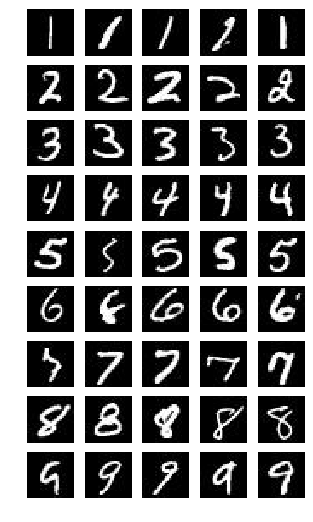

In [81]:
print('plotting training images')
plotTrainImage()

In [82]:
# FUNCTION FOR PLOTTING TEST IMAGES 

def plotTestImage():
    
    fig = plt.figure(figsize=(5, 10))    
    paths = os.listdir(TEST)    
        
    for i in range(1, 51):
        randomNumber = random.randint(0, len(paths)-1)
        image = Image.open(TEST/paths[randomNumber])
        
        ax = fig.add_subplot(10, 5, i)
        ax.axis("off")
        
        plt.imshow(image, cmap='gray')
    plt.show()



plotting testing images


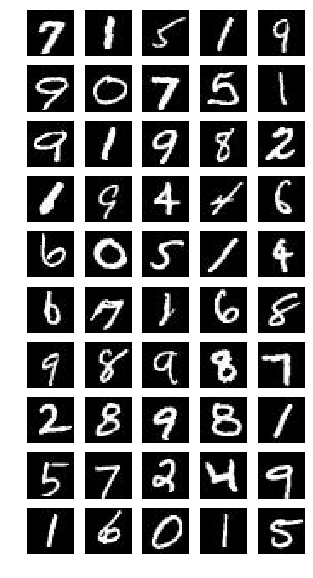

In [83]:
print('plotting testing images')
plotTestImage()

<a id = 'feed_fastai'></a>
### Now that the data is in the correct file and folder structure, we will feed it it to [DataBunch](https://docs.fast.ai/basic_data.html#DataBunch) object which is used inside the FastAI library to train the CNN Learner class

In [84]:
# transforms which are a part of data augmentation
tfms = get_transforms(do_flip = False)


In [85]:
print('test : ',TEST)
print('train: ', TRAIN)
print(type(TEST))

test :  ../test
train:  ../train
<class 'pathlib.PosixPath'>


In [86]:
ls ..

input/  lib/  test/  train/  working/


In [87]:
data = ImageDataBunch.from_folder(

    path = ("../train"),
    test = ("../test"),
    valid_pct = 0.1,
#     bs = 16,
    bs = 256,    
    size = 28,
    num_workers = 0,
    ds_tfms = tfms
)

In [88]:
mnist_stats

([0.131], [0.308])

In [89]:
# data.normalize(mnist_stats)
# data.normalize(mnist_stats)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (37800 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
5,5,5,5,5
Path: ../train;

Valid: LabelList (4200 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,4,2,6,4
Path: ../train;

Test: LabelList (28000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: EmptyLabelList
,,,,
Path: ../train

In [90]:
print(data.classes)
print('There are', data.c, 'classes here')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
There are 10 classes here


## The data is ready. Time to feed it to a Convolutional Neural Network. 

* There are many architures to choose it from. I have tried different architectures, implemented them in Tensorflow that you can find in 
    [this Notebook](https://www.kaggle.com/sanwal092/tensorflow-and-cnn-99-accuracy)
* For implementation here, I will use Resnet18 which as shown in FASTAI lecture 1. It performed well on many different metrics. There are more sophiscated version of Resnet such as Resnet34 and Resnet50, but I will be sticking to Resnet18 here

* I will be using FastAI's cnn_learner fucntion to implement a ResNet architecture. This is a really handy function to skip implementing the Resnet architecture from scratch which would be a nightmare. 





**> >>>  set up for resnet34**

In [91]:
#VERSION 1
# learn = cnn_learner(data, base_arch = models.resnet18, metrics = accuracy,model_dir="/tmp/models", callback_fns=ShowGraph )

#version 2
learn = cnn_learner(data, base_arch = models.resnet34, metrics = accuracy,model_dir="/tmp/models", callback_fns=ShowGraph )

# version 3
# learn = cnn_learner(data, base_arch = models.resnet50, metrics = accuracy,model_dir="/tmp/models", callback_fns=ShowGraph )

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 35391082.50it/s]


### In FastAI, the function to fit the CNN to the data is called fit_one_cycle which is based on the application of this [paper by Leslie Smith](https://arxiv.org/abs/1803.09820)



<a id = 'model_log'></a>
## So far, this is what I tried:

## VERSION 1: 
    * This is a bit of cheating because I tried it in 2 phases. For both the phases I used Resnet18. 
    * However, in the first phase I only trained for maybe 10 epochs. In the second, I trained for 30. The score jumped up from 10% to 99.03% 
    at test-time. 
    * The learning rate I used was 1e-6.
    
## VERSION 2:
    * I will be using Resnet34 here. 
    * I used 15 epochs with learning rate of 4e-6. 
    * The training time was about 30 minutes on Kaggle GPUs. 
    * Score = 99.10%    
   
## VERSION 3:
    * Still Resnet34.
    * 20 epochs, learning rate of 4e-6
    * Took about 40 minutes of training with result 99.10%. My highest score was 99.428% using TensorFlow to build up model
      which took close to 2 hours to train.I want to see how close I can get to that if not beat it.
    * Score = 99.142%
    
## VERSION 4: 
    * Resnet50
    * 15 epochs to start and see what happens
    * It took almost 1.5 hours to train and didn't offer any significant imporvement on anything. ResNet might be a
      bit of an overkill.
    * Score = 97.75%. 

## VERSION 5: 
    * Back to Resnet34. 
    * Will try 30 epochs this. 
    * Instead of using mnist_stats, i am normalizing based on image_net stats and using a batch size of 256 instead of 16.
    

In [92]:
doc(fit_one_cycle)

### train fit_one_cycle for 5 cycles to get an idea of how accurate the model is.

epoch,train_loss,valid_loss,accuracy,time
0,0.998171,0.574857,0.812381,04:37
1,0.516861,0.346819,0.887619,04:37
2,0.411647,0.307354,0.901667,04:36


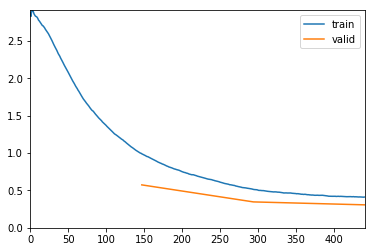

In [93]:
learn.fit_one_cycle(3)

# Our model was able to get to very high accuracy in just a few epoch(s). 

* This is nothing to be sneezed at. Now, we will fine tune the mode 

* We will now use FastAI's lr_find function to find a range of learning rate which we could choose from. 

* We use recorder.plot to visualize this rannge.

In [95]:
learn.save('model1')

In [102]:
learn.load('model1')

Learner(data=ImageDataBunch;

Train: LabelList (37800 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
5,5,5,5,5
Path: ../train;

Valid: LabelList (4200 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,4,2,6,4
Path: ../train;

Test: LabelList (28000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: EmptyLabelList
,,,,
Path: ../train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1),

In [103]:
learn.unfreeze()

In [104]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


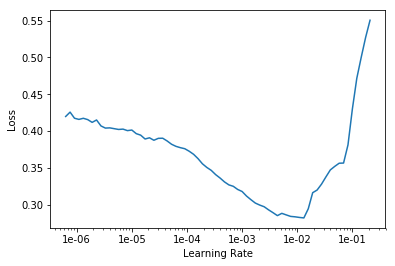

In [105]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.099145,0.058140,0.980952,08:17
1,0.071965,0.039552,0.988810,08:19
2,0.063293,0.075416,0.976190,08:08
3,0.066548,0.057166,0.984524,08:14
4,0.066181,0.060119,0.985714,08:11
5,0.070304,0.102271,0.971429,08:16
6,0.069033,0.046562,0.988571,08:20
7,0.056492,0.050554,0.985238,08:13
8,0.055179,0.036288,0.990000,08:11
9,0.050378,0.046917,0.987857,08:11


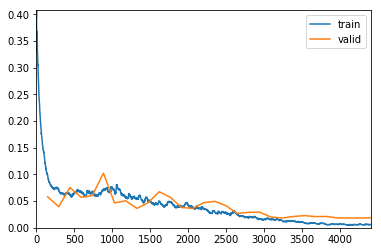

In [106]:
learn.fit_one_cycle(30 , slice(1e-3, 1e-2))

<a id = 'make_preds'></a>
### In just a few epochs, the model was able to achieve a very high accuracy.Time to evaluate results 

### Let's see some of the predictions made by our model



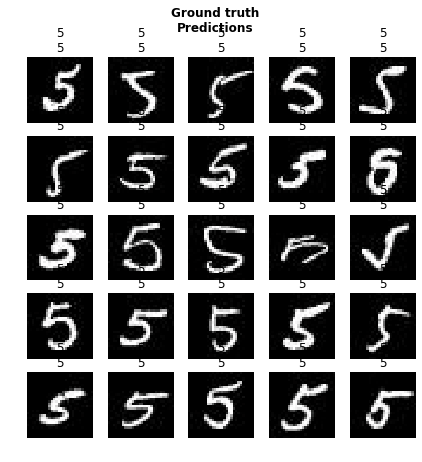

In [107]:
learn.show_results(3, figsize= (7,7))

## Let's check the the top 6 images with highest losses. 

In [108]:
interp = ClassificationInterpretation.from_learner(learn)

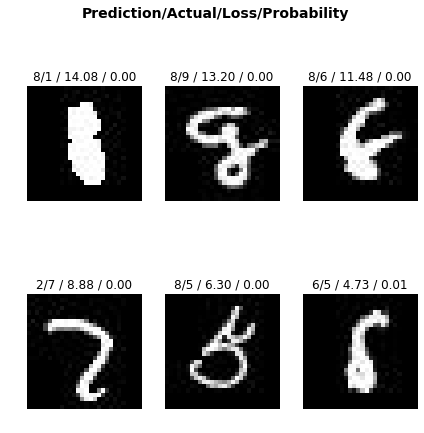

In [109]:
interp.plot_top_losses(6, figsize=(7, 7))

## Okay, some of these are really hard to pin down as one specific integers. So, I don't feel too bad about my model getting it wrong. Let's take a look at the Confusion matrix.

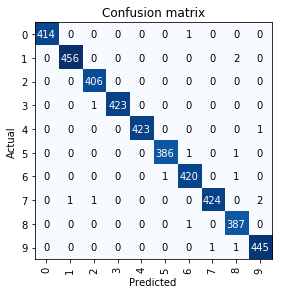

In [110]:
interp.plot_confusion_matrix()

## Time to make some predictions

![](https://media.giphy.com/media/l2JJu8U8SoHhQEnoQ/giphy.gif)


In [115]:
class_score , y = learn.get_preds(DatasetType.Test)

In [ ]:
probabilities = class_score[0].tolist()
[f"{index}: {probabilities[index]}" for index in range(len(probabilities))]

## Right now, our predictions include 10 separate predictions for each image. We will only take the top class and then save it as our result

In [114]:
class_score = np.argmax(class_score, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
class_score[1].item()

In [ ]:
sample_submission =  pd.read_csv(INPUT/"sample_submission.csv")
display(sample_submission.head(2))
display(sample_submission.tail(2))

In [ ]:
# remove file extension from filename
ImageId = [os.path.splitext(path)[0] for path in os.listdir(TEST)]
# typecast to int so that file can be sorted by ImageId
ImageId = [int(path) for path in ImageId]
# +1 because index starts at 1 in the submission file
ImageId = [ID+1 for ID in ImageId]

In [ ]:
submission  = pd.DataFrame({
    "ImageId": ImageId,
    "Label": class_score
})
# submission.sort_values(by=["ImageId"], inplace = True)
submission.to_csv("submission.csv", index=False)
display(submission.head(3))
display(submission.tail(3))

